perte calculé :  0.010319128139009563


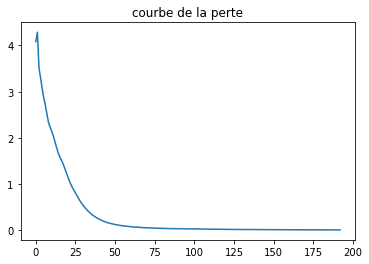

le taux de reconnaissance est :  79.54545454545455 %


SystemExit: 0

c:\python\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 02 20:07:20 2021
@author: Chaimae
"""
from PyQt5 import QtWidgets, QtCore, QtGui
from PyQt5.QtWidgets import QFileDialog
import numpy as np
from skimage.io import imread
from skimage.color import rgb2grey
from skimage.filters import threshold_mean
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

def apprentissage_des_images():
    y = np.array(
        [1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13,
         14, 14,
         15, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26])
    images = []
    for i in range(1, 63):
        img = "C:/Users/bens2/Desktop/master/images/apprentissage/".__add__(i.__str__()).__add__(".png")
        imageRGB = imread(img)
        image = rgb2grey(imageRGB)
        thresh = threshold_mean(image)
        binary = image > thresh
        binary = binary * 1
        images.append(np.ravel(binary))
    return images, y
def taux_reussi():
    y = np.array([1,1,2,2,3,3,4,4,5,5,6,6,6,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,18,19,19,20,21,21,22,23,24,25,26])
    compt = 0
    for i in range(1,45):
        img = "C:/Users/bens2/Desktop/master/images/TEST/".__add__(i.__str__()).__add__(".png")
        imageTestRGB = imread(img)
        imageTest = rgb2grey(imageTestRGB)
        thresh = threshold_mean(imageTest)
        binaryTest = imageTest > thresh
        binaryTest = binaryTest * 1
        imageTest = np.ravel(binaryTest)
        y_pred = cl.predict([imageTest])
        y_pred = np.int(y_pred[0])
        if y_pred == y[i-1]:
            compt = compt + 1
        taux = (compt/44)*100
    print("le taux de reconnaissance est : ",taux,"%")
        
        
class Ui_MainWindow(QtWidgets.QWidget):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(419, 341)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(110, 10, 261, 21))
        font = QtGui.QFont()
        font.setPointSize(12)
        self.label.setFont(font)
        self.label.setObjectName("label")
        self.pushButton = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton.setGeometry(QtCore.QRect(120, 40, 181, 31))
        self.pushButton.setObjectName("pushButton")
        self.imageLabel = QtWidgets.QLabel(self.centralwidget)
        self.imageLabel.setGeometry(QtCore.QRect(135, 80, 201, 151))
        self.imageLabel.setText("")
        self.imageLabel.setObjectName("imageLabel")
        self.resultLabel = QtWidgets.QLabel(self.centralwidget)
        self.resultLabel.setGeometry(QtCore.QRect(100, 250, 221, 21))
        self.resultLabel.setText("")
        self.resultLabel.setObjectName("resultLabel")
        MainWindow.setCentralWidget(self.centralwidget)
        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)


    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.label.setText(_translate("MainWindow", "Le Classifieur Neuronal PMC"))
        self.pushButton.setText(_translate("MainWindow", "Choisir une image"))
        self.pushButton.clicked.connect(self.openFile)


    def openFile(self):
        alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
                 "U", "V", "W", "X", "Y", "Z"]
        nom_fichier = QFileDialog.getOpenFileName()
        self.path = nom_fichier[0]
        pathx = self.path

        pixmap = QtGui.QPixmap(pathx)
        pixmap4 = pixmap.scaled( 151,301, QtCore.Qt.KeepAspectRatio)
        self.imageLabel.setPixmap(QtGui.QPixmap(pixmap4))


        imageTestRGB = imread(self.path)
        imageTest = rgb2grey(imageTestRGB)
        thresh = threshold_mean(imageTest)
        binaryTest = imageTest > thresh
        binaryTest = binaryTest * 1
        imageTest = np.ravel(binaryTest)

        y_pred = cl.predict([imageTest])
        y_pred = np.int(y_pred[0])
        self.resultLabel.setText("Le caractere que vous avez choisi est : "+alphabet[y_pred-1])

if __name__ == "__main__":
    import sys

    x, y = apprentissage_des_images()
    cl = MLPClassifier(activation="relu", max_iter=1000)
    cl.fit(x, y)
    print("perte calculé : ", cl.loss_)
    plt.plot(cl.loss_curve_)
    plt.title("courbe de la perte")
    plt.show()
    taux_reussi()
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

